In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


In [7]:
df.isnull().count()

region     1000
tenure     1000
age        1000
marital    1000
address    1000
income     1000
ed         1000
employ     1000
retire     1000
gender     1000
reside     1000
custcat    1000
dtype: int64

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

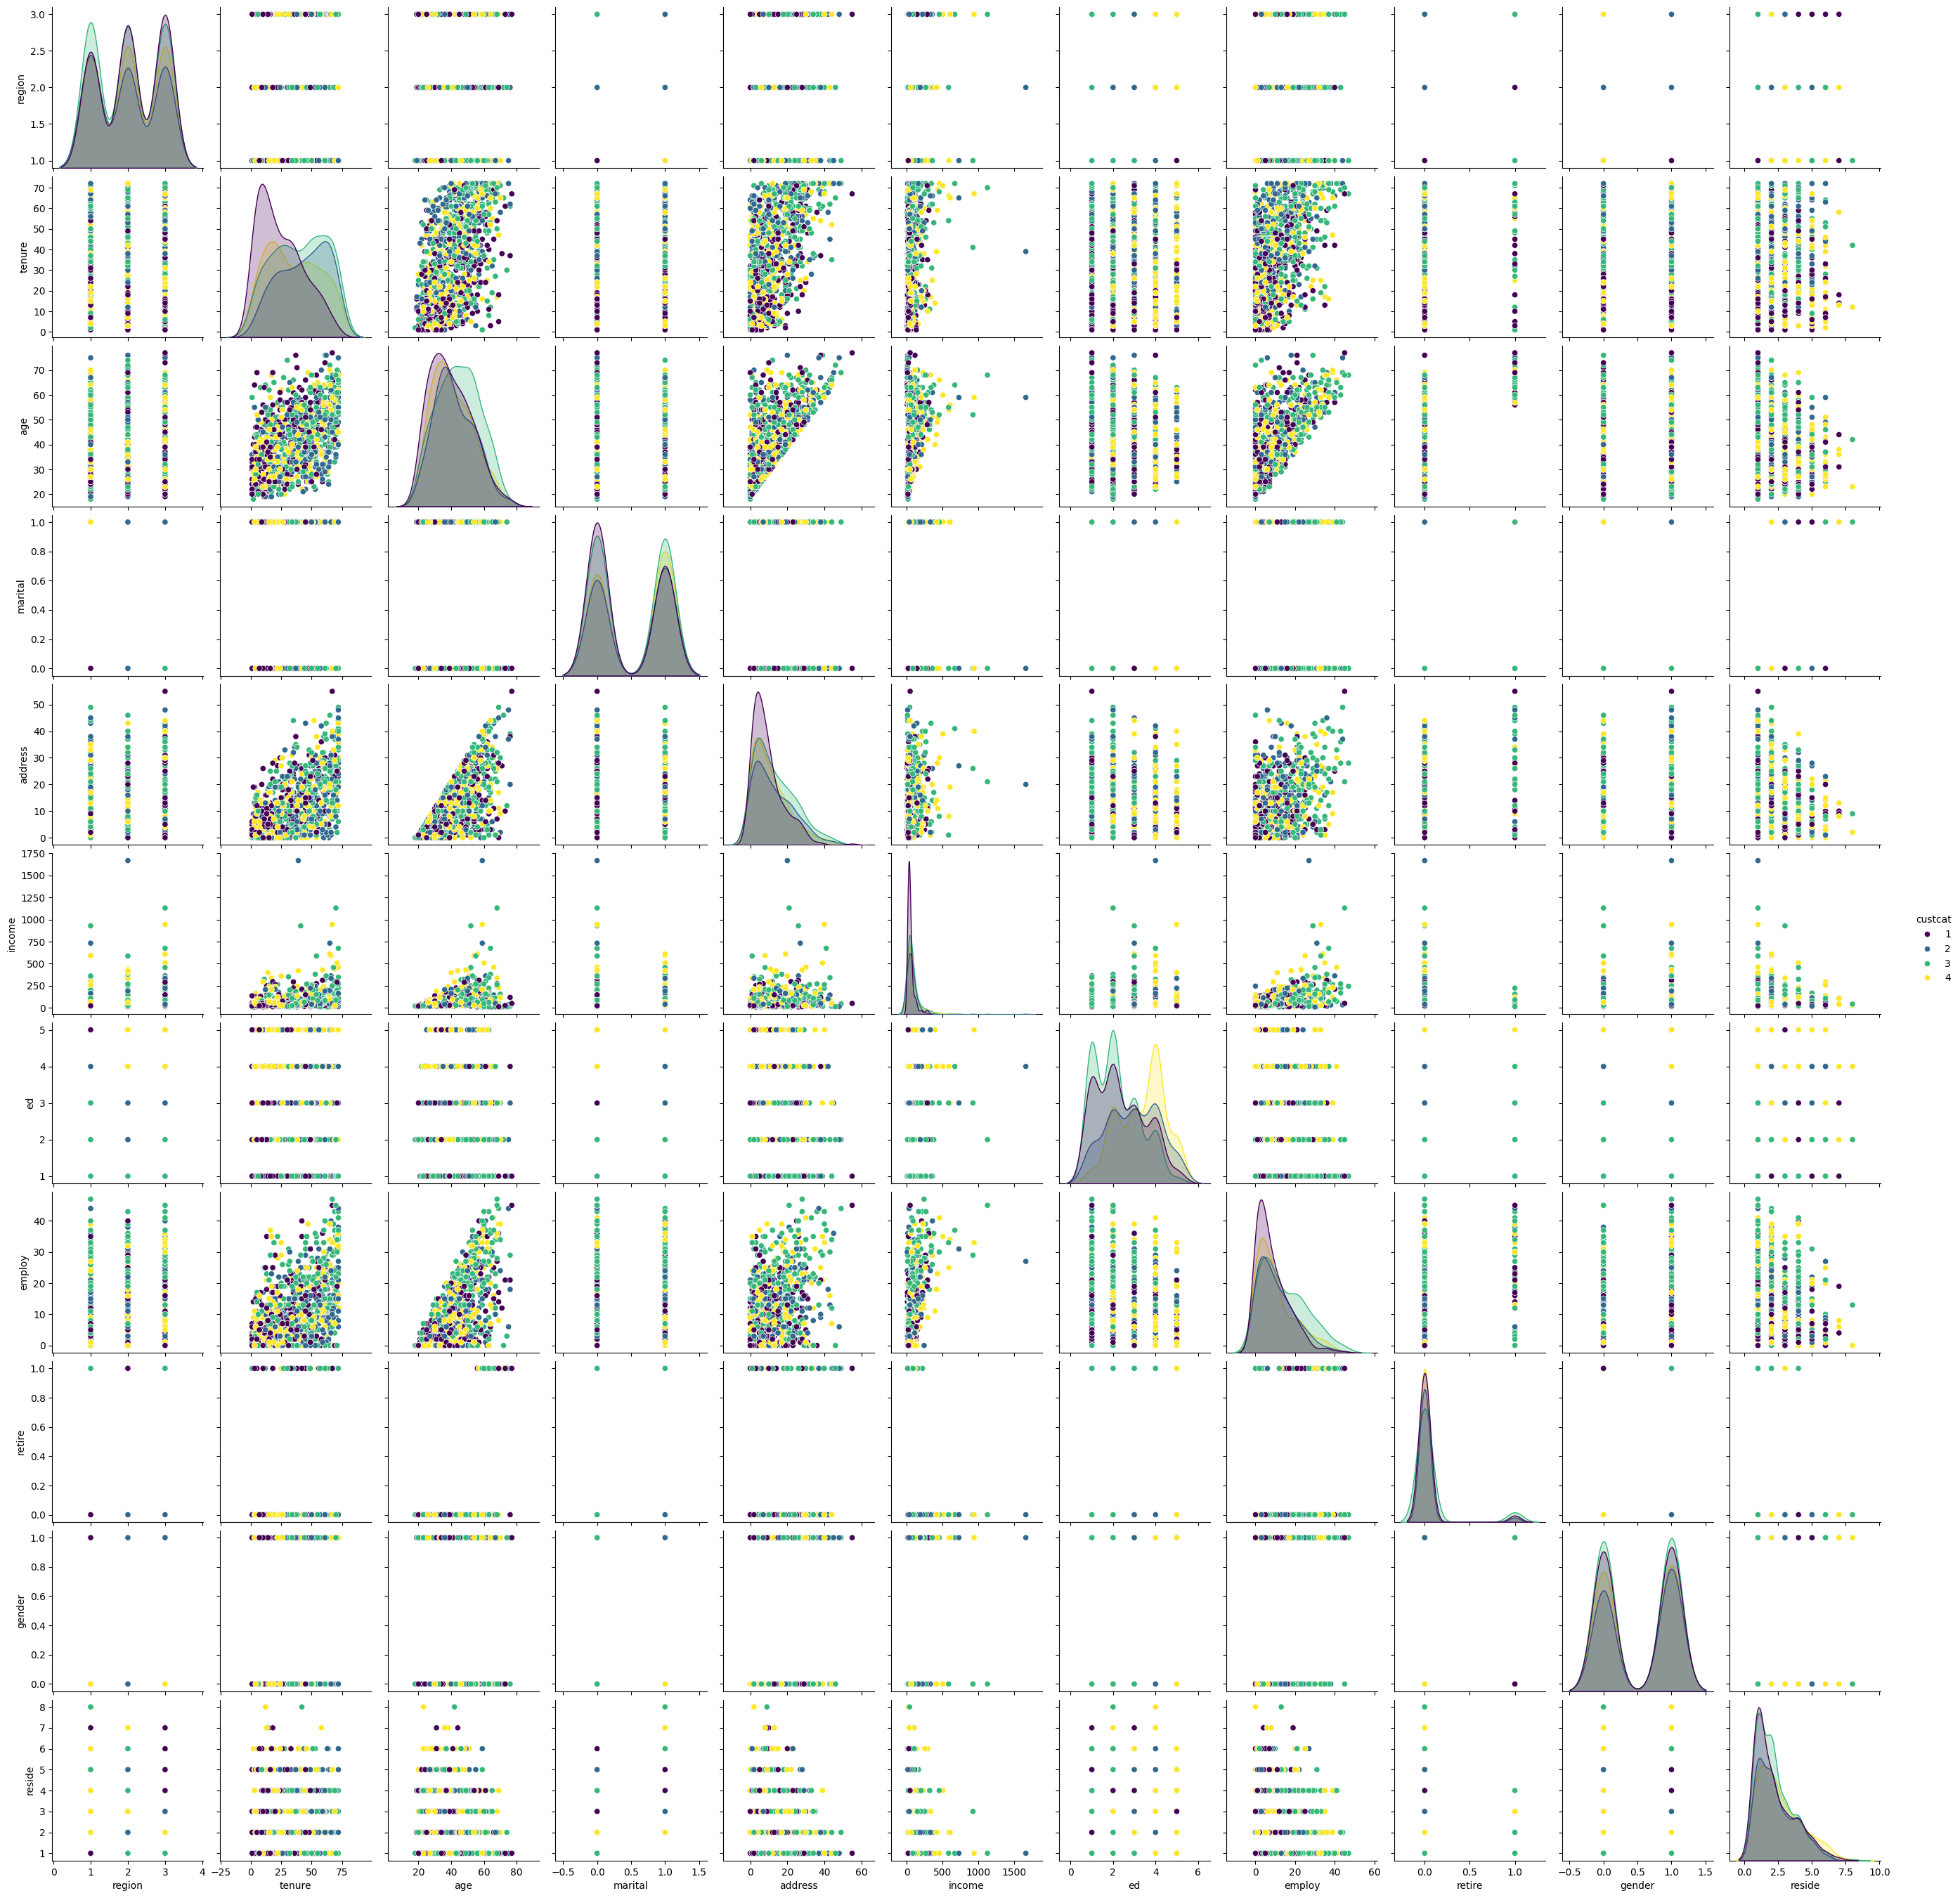

In [34]:
sns.pairplot(df, hue='custcat', palette='viridis')
plt.show()

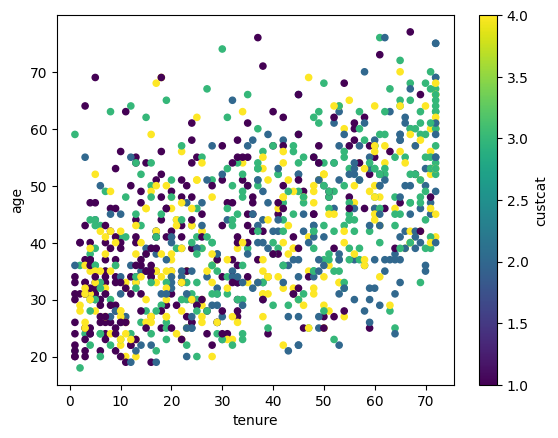

In [38]:
df.plot.scatter(x='tenure', y='age', c='custcat', colormap='viridis')
plt.show()

In [10]:
X = df.drop('custcat', axis=1)
y = df['custcat']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
206,1,72,69,1,49,44.0,2,44,1.0,1,2
554,1,9,28,0,7,30.0,1,4,0.0,1,6
249,2,33,33,1,12,42.0,4,7,0.0,1,5
335,1,34,55,0,2,48.0,2,11,0.0,0,1
99,3,65,58,0,30,83.0,2,16,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
495,2,13,38,1,8,104.0,4,6,0.0,0,7
632,2,24,40,1,4,39.0,3,5,0.0,1,2
228,3,6,33,0,12,26.0,3,0,0.0,0,1
987,1,4,30,0,1,45.0,4,6,0.0,0,3


In [13]:
X_train.shape

(800, 11)

In [15]:
y_train.shape

(800,)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNN = KNeighborsClassifier(n_neighbors = 5)

In [21]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
pred = KNN.predict(X_test)
pred

array([1, 2, 1, 2, 3, 3, 3, 2, 1, 3, 1, 1, 4, 3, 3, 3, 4, 1, 4, 3, 4, 4,
       3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2, 4, 1, 3, 1, 2, 3, 3, 1,
       2, 2, 1, 4, 3, 4, 2, 4, 1, 1, 2, 3, 2, 2, 3, 1, 4, 4, 4, 1, 3, 3,
       1, 1, 2, 2, 1, 3, 1, 3, 3, 4, 4, 1, 1, 3, 3, 4, 3, 3, 1, 1, 1, 1,
       1, 1, 3, 4, 3, 4, 1, 3, 2, 3, 1, 1, 2, 4, 3, 2, 1, 1, 3, 1, 3, 1,
       4, 3, 4, 4, 2, 2, 1, 2, 1, 1, 2, 1, 2, 3, 4, 3, 3, 4, 4, 1, 2, 1,
       2, 3, 4, 2, 2, 1, 3, 3, 3, 2, 2, 4, 4, 4, 2, 3, 4, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 3, 1, 1, 2, 1, 1, 1, 4, 3, 1, 1, 4, 2, 3, 3, 2, 4, 1,
       1, 1, 1, 2, 3, 4, 3, 1, 2, 2, 1, 1, 1, 2, 1, 3, 3, 3, 1, 4, 4, 2,
       4, 4])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, precision_score, recall_score, roc_auc_score, roc_curve

In [29]:
accuracy_score(y_test, pred)

0.275

In [28]:
confusion_matrix(y_test, pred)

array([[20,  7, 17,  7],
       [13, 12, 14, 10],
       [16, 12, 14, 12],
       [19, 11,  7,  9]])

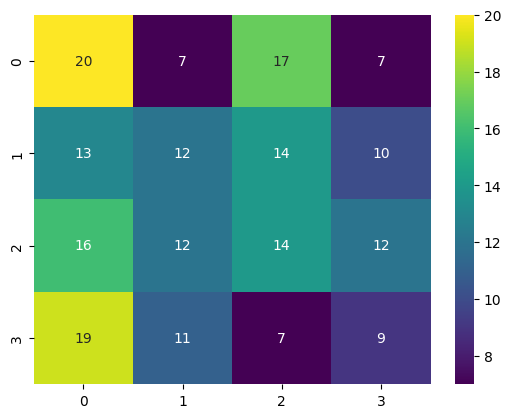

In [49]:
sns.heatmap(confusion_matrix(y_test, pred), cmap='viridis', annot=True)
plt.show()

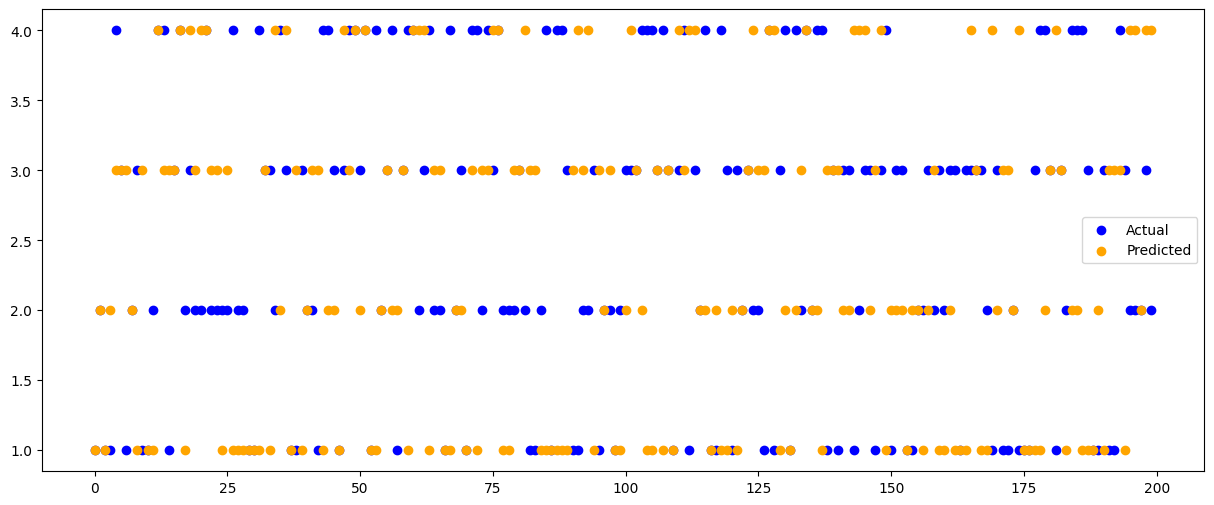

In [64]:
l = np.arange(0, len(X_test))
plt.figure(figsize=(15,6))
plt.scatter(l, y_test, label="Actual", color='blue')
plt.scatter(l, pred, label="Predicted", color="orange")
plt.legend()
plt.show()

In [39]:
precision_score(y_test, pred, average='weighted')

0.272165991902834

In [40]:
recall_score(y_test, pred, average='weighted')

0.275

In [42]:
f1_score(y_test, pred, average = "weighted")

0.2709361393323657

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.29      0.39      0.34        51
           2       0.29      0.24      0.26        49
           3       0.27      0.26      0.26        54
           4       0.24      0.20      0.21        46

    accuracy                           0.28       200
   macro avg       0.27      0.27      0.27       200
weighted avg       0.27      0.28      0.27       200

